In [1]:
#import necessary libraries and packages
import os
import sys
import SimpleITK as sitk
import warnings
from tqdm import tqdm
from keras.layers import Input
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/tensorflow-1.8/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [7]:
# here I have a Data folder that contains two subfolders 0: for patients who responded negatively 
# and 1: for patients who responded positively
# so there is many patients on the 0 and 1 folders
INPUT_FOLDER_0 = 'Data/train/0/'
INPUT_FOLDER_1 = 'Data/train/1/'

In [8]:
#Responders
#Define lists of patients
#for each patient I have two 3D dicom file DCEMRI_1 and DCEMRI_2 with .nrrd format!
list_DCEMRI_1_0 = []
list_DCEMRI_2_0 = []
#here I have just to 'walk' within the folder and stock the exams into the list!
for d, s, fileList in os.walk(INPUT_FOLDER_0):
    for filename in fileList:
        if 'dcemri_1.nrrd' in filename.lower():
            list_DCEMRI_1_0.append(os.path.join(d,filename))
        elif 'dcemri_2.nrrd' in filename.lower():
            list_DCEMRI_2_0.append(os.path.join(d,filename))

In [9]:
#NO Responders
#same thing than before 
list_DCEMRI_1_1 = []
list_DCEMRI_2_1 = []


for d, s, fileList in os.walk(INPUT_FOLDER_1):
    for filename in fileList:
        if 'dcemri_1.nrrd' in filename.lower():
            list_DCEMRI_1_1.append(os.path.join(d,filename))
        elif 'dcemri_2.nrrd' in filename.lower():
            list_DCEMRI_2_1.append(os.path.join(d,filename))

In [10]:
#To check if we read the exams of each patient, we display the size of lists
print("no responders DCE_MRI_1 : ")
print(len(list_DCEMRI_1_0))
print("no responders DCE_MRI_2 : ")
print(len(list_DCEMRI_2_0))
print("responders DCE_MRI_1 : ")
print(len(list_DCEMRI_1_1))
print("responders DCE_MRI_2 : ")
print(len(list_DCEMRI_2_1))

no responders DCE_MRI_1 : 
45
no responders DCE_MRI_2 : 
45
responders DCE_MRI_1 : 
47
responders DCE_MRI_2 : 
47


images before class 0


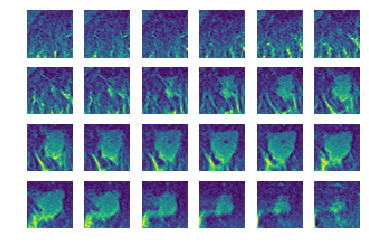

In [17]:
# Now try to screen one of the exams '10'
#DCEMRI_1:

import matplotlib.pyplot as plt
%matplotlib inline
print('images before class 0')
mr_image = sitk.ReadImage(list_DCEMRI_1_0[10])

for i in range(24):
    img = sitk.GetArrayViewFromImage(mr_image)[i,:,:]
    plt.subplot(4, 6, i+1)
    plt.imshow(img)
    #plt.title(i)
    plt.axis('off')  
    

images after class 0
(41, 43, 32)


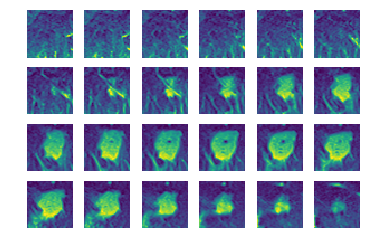

In [19]:
#DCEMRI_2 :

print('images after class 0')
mr_image = sitk.ReadImage(list_DCEMRI_2_0[10])
print(mr_image.GetSize())

for i in range(24):
    img = sitk.GetArrayViewFromImage(mr_image)[i,:,:]
    plt.subplot(4, 6, i+1)
    plt.imshow(img)
    #plt.title(i)
    plt.axis('off')